# CURSO VISUALIZACIÓN DE LA INFORMACIÓN
## TRABAJO PRÁCTICO 1

### Ejercicio 1
Realice las lecturas en dataframes de los datasets transacciones.csv y Netflix.csv,
para cada uno de ellos visualice e identifique la estructura de datos imprimiendo las
primeras 10 y las últimas 10 filas de cada uno. ¿Que otro tipo de información
característica para cada datasets puede informar?

## Dataset Transacciones 

### Lectura

In [142]:
import pandas as pd

data_trans = pd.read_csv("transacciones.csv") 

data_trans.head(10)

,Id,Date,Company Name,Transaction Amount
0,1,20-04-2021,DIRECTV,97345310
1,2,28-11-2021,Aysa,17375907
2,3,17-03-2021,Claro,91148233
3,4,19-05-2021,Metrogas,36578482
4,5,14-10-2021,Cablevision Fibertel,10918024
5,6,13-07-2021,Edesur,89325560
6,7,29-12-2021,Edenor,27659912
7,8,24-01-2021,Aysa,60128755
8,9,24-12-2021,Edenor,39365492
9,10,09-06-2021,Movistar,22690648


In [39]:
data_trans.tail(10)

,Id,Date,Company Name,Transaction Amount
990,991,18-12-2021,Movistar,65261916
991,992,07-12-2021,Metrogas,14773269
992,993,15-02-2021,Cablevision Fibertel,78921040
993,994,28-10-2021,Movistar,41741308
994,995,03-08-2021,Edesur,57739920
995,996,22-04-2021,Metrogas,12358137
996,997,30-08-2021,Andesat,17885179
997,998,20-04-2021,Movistar,91559368
998,999,24-01-2021,Movistar,11927399
999,1000,01-12-2021,Aysa,94413985


### Resultados de la detección de datos repetidos, nulos y revisión de inconsistencias

In [40]:
print(data_trans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  1000 non-null   int64 
 1   Date                1000 non-null   object
 2   Company Name        1000 non-null   object
 3   Transaction Amount  1000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.4+ KB
None


In [143]:
# Convertir la columna 'date_added' a tipo date
data_trans['Date'] = pd.to_datetime(data_trans['Date'],  dayfirst=True, errors='coerce')
data_trans.head(5)

,Id,Date,Company Name,Transaction Amount
0,1,2021-04-20,DIRECTV,97345310
1,2,2021-11-28,Aysa,17375907
2,3,2021-03-17,Claro,91148233
3,4,2021-05-19,Metrogas,36578482
4,5,2021-10-14,Cablevision Fibertel,10918024


Parsee el string cargado en la columna 'date_added' a un tipo DataTime, para su correcta interpretación y tratamiento.

In [42]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  1000 non-null   int64         
 1   Date                1000 non-null   datetime64[ns]
 2   Company Name        1000 non-null   object        
 3   Transaction Amount  1000 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ KB


In [43]:
# 1. Detección de datos repetidos
duplicated_data = data_trans.duplicated().sum()
print(f"Se encontraron {duplicated_data} datos repetidos.")
# Revisar errores ortográficos o inconsistencias en columnas categóricas
unique_values = {col: data_trans[col].unique() for col in data_trans.columns}

# Resultado de la revisión inicial
unique_values

Se encontraron 0 datos repetidos.


{'Id': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  146,  147, 

In [44]:
num_dumplicados = 0
for column in data_trans.columns:
    hay_duplicados = data_trans[column].duplicated().any()
    if hay_duplicados:
        print(f"Hay duplicados en la columna {column}")
        num_dumplicados += 1
    else:
        print(f"No hay duplicados en la columna {column}")
if num_dumplicados == len(data_trans.columns):
    print("¡En todas la columnas hay duplicados!")

No hay duplicados en la columna Id
Hay duplicados en la columna Date
Hay duplicados en la columna Company Name
No hay duplicados en la columna Transaction Amount


In [45]:
for column in data_trans.columns:
    print(column)
    print(data_trans[column].unique())

Id
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  195  196
  1

In [46]:
print("No hay datos nulos" if not data_trans.isna().any().any() else "Hay datos nulos")

No hay datos nulos


In [47]:
data_trans.describe(include='all')

,Id,Date,Company Name,Transaction Amount
count,1000.000000,1000,1000,1.000000e+03
unique,NaN,NaN,13,NaN
top,NaN,NaN,Movistar,NaN
freq,NaN,NaN,156,NaN
mean,500.500000,2021-06-30 12:36:00,NaN,5.348905e+07
min,1.000000,2021-01-01 00:00:00,NaN,7.124634e+06
25%,250.750000,2021-03-28 18:00:00,NaN,2.938196e+07
50%,500.500000,2021-06-26 00:00:00,NaN,5.416597e+07
75%,750.250000,2021-09-30 06:00:00,NaN,7.684376e+07
max,1000.000000,2021-12-30 00:00:00,NaN,9.898555e+07


- Datos duplicados:
    - Hay 0 filas duplicadas en el conjunto de datos.
    - La unica fila donde no hay valores duplicados es la columna Id, por lo que podemos tomar a la misma como indice.
- No hay valores nulos.

- Variables Numéricas
    - Date
    - Transaction Amount
- Variables Categóricas
    - Company
- Revisión de columnas categóricas:
    - La revisión inicial muestra una gran variedad de valores únicos en columna Company.


### Identificación y visualización de outliers en 'Date' y 'Transaction Amount'

C:\Users\dpenaloza\AppData\Local\Temp\ipykernel_8416\980845678.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([pd.to_datetime(t, unit='s').strftime('%Y-%m-%d') for t in ticks])


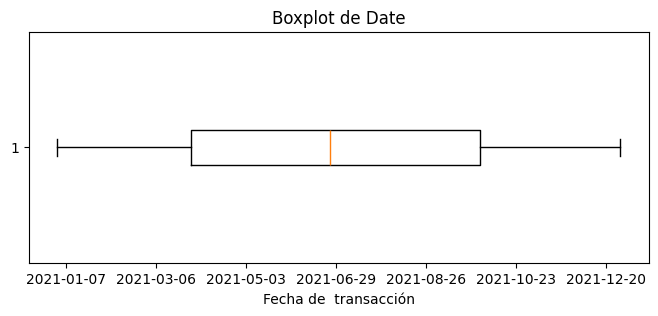

In [145]:
import matplotlib.pyplot as plt
# Convertir la columna 'date_added' a timestamps
data_trans['date_timestamp'] = data_trans['Date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

# Crear el boxplot
plt.figure(figsize=(8, 3))
plt.boxplot(data_trans['date_timestamp'].dropna(), vert=False)
plt.title('Boxplot de Date')
plt.xlabel('Fecha de  transacción')

# Convertir los valores de timestamp a datetime para las etiquetas
ticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([pd.to_datetime(t, unit='s').strftime('%Y-%m-%d') for t in ticks])
plt.show()



In [147]:
# Continuar con la identificación de outliers en 'date_timestamp'
Q1 = data_trans['date_timestamp'].quantile(0.25)
print(f'Q1={Q1}')
Q3 = data_trans['date_timestamp'].quantile(0.75)
print(f'Q3={Q3}')
IQR = Q3 - Q1

# Identificar límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = data_trans[(data_trans['date_timestamp'] < lower_bound) | (data_trans['date_timestamp'] > upper_bound)].date_timestamp

# Mostrar resultados
outliers_summary = outliers.describe()

outliers_summary


Q1=1616954400.0
Q3=1632981600.0


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: date_timestamp, dtype: float64

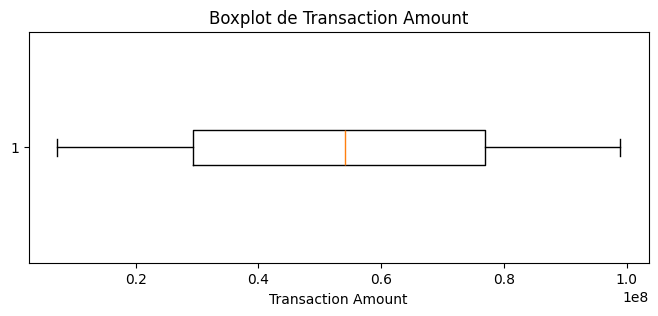

In [148]:
import matplotlib.pyplot as plt
# Identificación y visualización de outliers en 'release_year'
plt.figure(figsize=(8, 3))
plt.boxplot(data_trans['Transaction Amount'].dropna(), vert=False)
plt.title('Boxplot de Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()

In [149]:
# Continuar con la identificación de outliers en 'release_year'
Q1 = data_trans['Transaction Amount'].quantile(0.25)
print(f'Q1={Q1}')
Q3 = data_trans['Transaction Amount'].quantile(0.75)
print(f'Q3={Q3}')
IQR = Q3 - Q1

# Identificar límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers2 = data_trans['Transaction Amount'][(data_trans['Transaction Amount'] < lower_bound) | (data_trans['Transaction Amount'] > upper_bound)]

# Mostrar resultados
outliers_summary2 = outliers2.describe()

outliers_summary2

Q1=29381963.0
Q3=76843757.25


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Transaction Amount, dtype: float64

#### Resultados de la Identificación de Outliers
Tanto para Date como para 'Transaction Amount' no presentan datos atípicos. 

### Análisis Estadístico Descriptivo

In [58]:
# Análisis estadístico descriptivo de las variables relevantes
statistical_summary = data_trans.describe(include='all')

# Mostrar análisis estadístico completo
#import ace_tools as tools; tools.display_dataframe_to_user(name="Resumen Estadístico de los Datos", dataframe=statistical_summary)

statistical_summary


,Id,Date,Company Name,Transaction Amount,date_timestamp
count,1000.000000,1000,1000,1.000000e+03,1.000000e+03
unique,NaN,NaN,13,NaN,NaN
top,NaN,NaN,Movistar,NaN,NaN
freq,NaN,NaN,156,NaN,NaN
mean,500.500000,2021-06-30 12:36:00,NaN,5.348905e+07,1.625057e+09
min,1.000000,2021-01-01 00:00:00,NaN,7.124634e+06,1.609459e+09
25%,250.750000,2021-03-28 18:00:00,NaN,2.938196e+07,1.616954e+09
50%,500.500000,2021-06-26 00:00:00,NaN,5.416597e+07,1.624666e+09
75%,750.250000,2021-09-30 06:00:00,NaN,7.684376e+07,1.632982e+09
max,1000.000000,2021-12-30 00:00:00,NaN,9.898555e+07,1.640822e+09


El resumen estadístico proporciona información valiosa sobre las columnas del dataset:

- Id: Cada registro es único.
- Date:
    - Media: 30-06-2021.
    - Rango: 01-01-2021 al 30-12-2021
- Company name:
    - Valores únicos: 13.
    - 'Movistar' es el más frecuente, 156 ocurrencias.
- Transaction Amount:
    - Media:    53489050
    - min:       7124634 
    - max:      98985550

### Distribución de los Datos

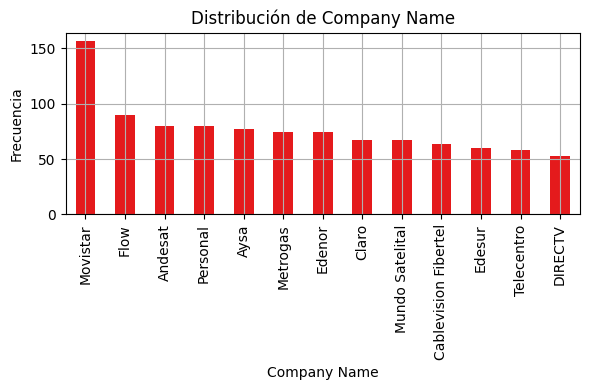

(count                   1000
 mean     2021-06-30 12:36:00
 min      2021-01-01 00:00:00
 25%      2021-03-28 18:00:00
 50%      2021-06-26 00:00:00
 75%      2021-09-30 06:00:00
 max      2021-12-30 00:00:00
 Name: Date, dtype: object,
 count    1.000000e+03
 mean     5.348905e+07
 std      2.663909e+07
 min      7.124634e+06
 25%      2.938196e+07
 50%      5.416597e+07
 75%      7.684376e+07
 max      9.898555e+07
 Name: Transaction Amount, dtype: float64,
 {'Company Name': Company Name
  Movistar                156
  Flow                     90
  Andesat                  80
  Personal                 80
  Aysa                     77
  Metrogas                 74
  Edenor                   74
  Claro                    67
  Mundo Satelital          67
  Cablevision Fibertel     64
  Edesur                   60
  Telecentro               58
  DIRECTV                  53
  Name: count, dtype: int64})

In [64]:
import matplotlib.pyplot as plt

# Distribución de variables categóricas
categorical_columns = ['Company Name']
categorical_distribution = {col: data_trans[col].value_counts() for col in categorical_columns}

# Distribución de variables numéricas 'release_year'
numeric_distribution_date = data_trans['Date'].describe()

# Distribución de variables numéricas 'date_added' 
numeric_distribution_amount = data_trans['Transaction Amount'].describe()

# Visualización de las distribuciones categóricas
fig, ax = plt.subplots(1, 1, figsize=(6, 4))


data_trans['Company Name'].value_counts().plot(kind='bar', ax=ax, cmap='Set1')
ax.set_title(f'Distribución de Company Name')
ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.grid()
plt.show()

# Mostrar las descripciones numéricas y categóricas
numeric_distribution_date, numeric_distribution_amount, categorical_distribution



Estadísticas de las Variables Numéricas:
- Date:
    - count                   1000
    - mean     2021-06-30 12:36:00
    - min      2021-01-01 00:00:00
    - 25%      2021-03-28 18:00:00
    - 50%      2021-06-26 00:00:00
    - 75%      2021-09-30 06:00:00
    - max      2021-12-30 00:00:00

- Transaction Amount:
    - count    1.000000e+03
    - mean     5.348905e+07
    - std      2.663909e+07
    - min      7.124634e+06
    - 25%      2.938196e+07
    - 50%      5.416597e+07
    - 75%      7.684376e+07
    - max      9.898555e+07
    - Name: , dtype: float64,

Estadísticas de las Variable Categórica:
- Company Name:
    - Movistar                156
    - Flow                     90
    - Andesat                  80
    - Personal                 80
    - Aysa                     77
    - Metrogas                 74
    - Edenor                   74
    - Claro                    67
    - Mundo Satelital          67
    - Cablevision Fibertel     64
    - Edesur                   60
    - Telecentro               58
    - DIRECTV                  53

In [85]:
data_company = pd.DataFrame(categorical_distribution)
data_company.rename(columns={'Company Name': 'count'}, inplace=True)
data_company.reset_index()

,Company Name,count
0,Movistar,156
1,Flow,90
2,Andesat,80
3,Personal,80
4,Aysa,77
5,Metrogas,74
6,Edenor,74
7,Claro,67
8,Mundo Satelital,67
9,Cablevision Fibertel,64


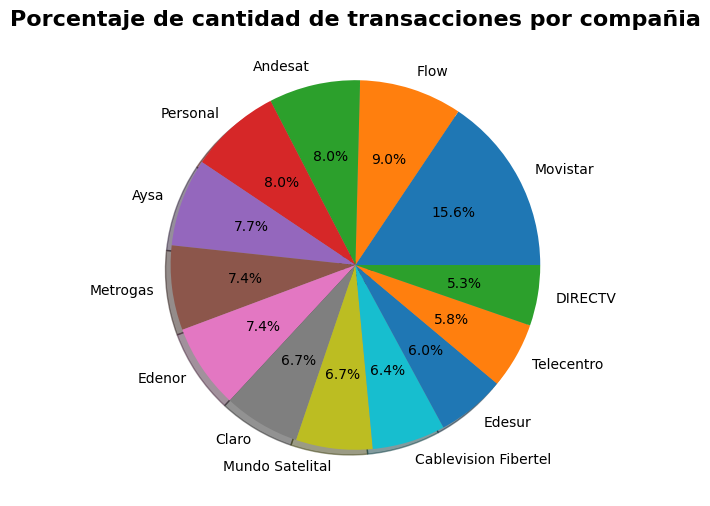

In [121]:
from matplotlib import pyplot as plt

# Asegúrate de que `data_company` es el DataFrame correcto y contiene la columna 'count'
#data_company = data_company.reset_index()

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus necesidades
wedges, texts, autotexts = ax.pie(
    data_company['count'],  # Asegúrate de usar la columna 'count' del DataFrame
    labels=data_company['Company Name'],  # Asegúrate de usar la columna 'Company Name' del DataFrame
    autopct='%1.1f%%', 
    shadow=True
)

#ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Porcentaje de cantidad de transacciones por compañia", fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Mostrar el gráfico
plt.show()


Las gráficas muestran la distribución de las variables categóricas:

- La mayoría de las  transacciones corresponden a Movistar, lo que corresponde a un 15.6 % de los registros.

### Visualización

Vamos a generar visualizaciones adicionales para identificar patrones y tendencias en los datos, como la evolución de la cantidad de las transacciones  a lo largo del  año y la distribución del monto total de las transaccion por compañia.

Text(0, 0.5, 'Cantidad de transacciones')

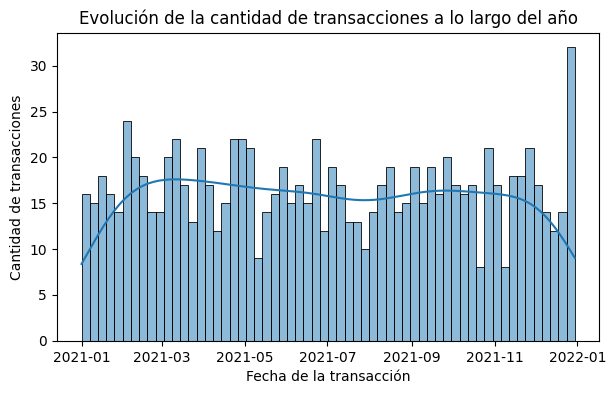

In [92]:

import seaborn as sns

# Visualización de la evolución de cantidad de transaccio a lo largo de los año.
fig, ax = plt.subplots(figsize=(7,4))
sns.histplot(data_trans.Date, bins=60, kde=True)
ax.set_title('Evolución de la cantidad de transacciones a lo largo del año')
ax.set_xlabel('Fecha de la transacción')
ax.set_ylabel('Cantidad de transacciones')




- Evolución de la cantidad de transacciones a lo largo del año.

    Hay alta variabilidad con un pico en fin de año.

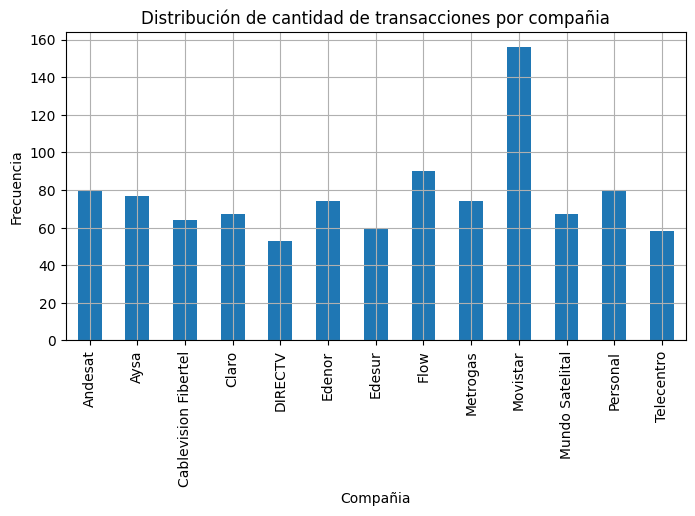

In [112]:
# Visualización de la distribución de ratings por tipo de contenido
plt.figure(figsize=(8, 4))
data_trans.groupby(['Company Name']).size().plot(kind='bar')
plt.title('Distribución de cantidad de transacciones por compañia')
plt.xlabel('Compañia')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Se observa la mayor cantidad de transacciones par la empressa Movistar.

In [113]:
# Agrupar por 'Company Name' y sumar los montos de las transacciones
total_transactions_per_company = data_trans.groupby('Company Name')['Transaction Amount'].sum().reset_index()

# Renombrar las columnas para mayor claridad
total_transactions_per_company.columns = ['Company Name', 'Total Transaction Amount']

# Ordenar el DataFrame por 'Total Transaction Amount' en orden descendente
total_transactions_per_company_sorted = total_transactions_per_company.sort_values(by='Total Transaction Amount', ascending=False)


# Mostrar el resultado
total_transactions_per_company_sorted



,Company Name,Total Transaction Amount
9,Movistar,8250775412
7,Flow,4738853026
0,Andesat,4460644840
1,Aysa,4247371598
5,Edenor,4098861077
11,Personal,4081126650
8,Metrogas,3945514475
3,Claro,3505152332
6,Edesur,3488051928
10,Mundo Satelital,3440771772


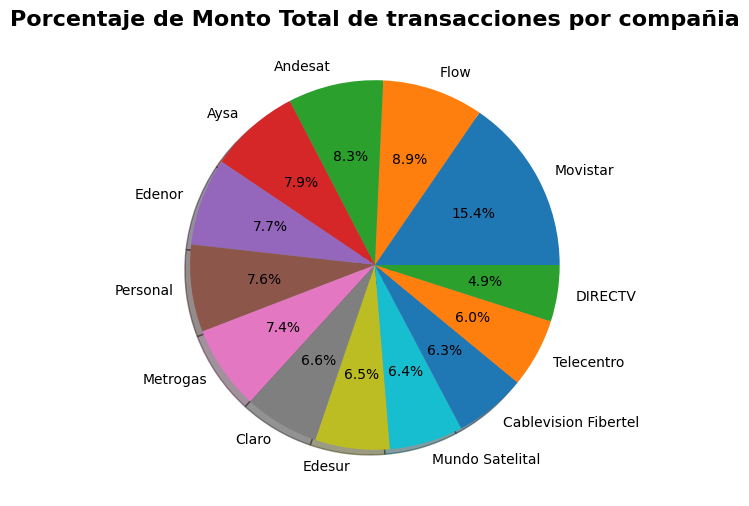

In [115]:
from matplotlib import pyplot as plt

# Asegúrate de que `data_company` es el DataFrame correcto y contiene la columna 'count'
#data_company = data_company.reset_index()

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus necesidades
wedges, texts, autotexts = ax.pie(
    total_transactions_per_company_sorted['Total Transaction Amount'],  # Asegúrate de usar la columna 'count' del DataFrame
    labels=total_transactions_per_company_sorted['Company Name'],  # Asegúrate de usar la columna 'Company Name' del DataFrame
    autopct='%1.1f%%', 
    shadow=True
)

#ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Porcentaje de Monto Total de transacciones por compañia", fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Mostrar el gráfico
plt.show()

Consecuentemente a la mayor cantidad de transacciones, el mayor monto total de las transacciones corresponde a Movistar.

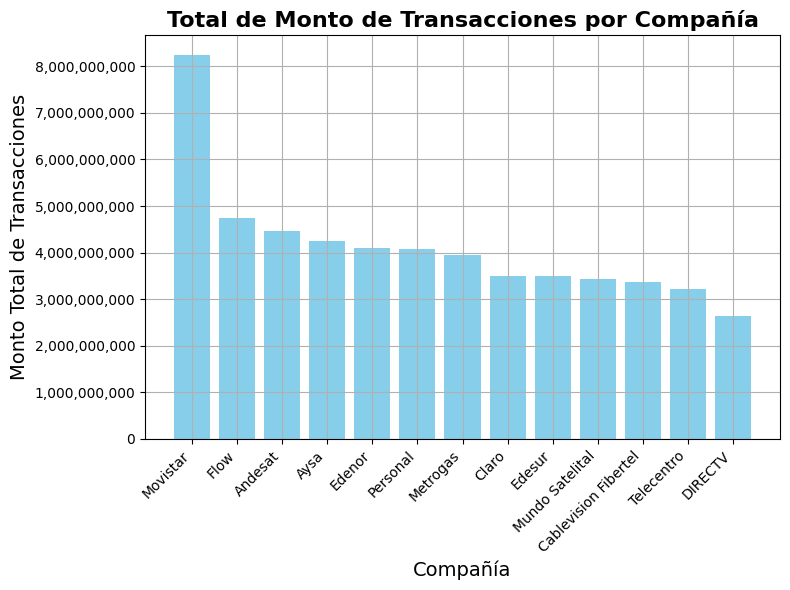

In [128]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(total_transactions_per_company_sorted['Company Name'], total_transactions_per_company_sorted['Total Transaction Amount'], color='skyblue')

# Añadir título y etiquetas
plt.title('Total de Monto de Transacciones por Compañía', fontsize=16, fontweight='bold')
plt.xlabel('Compañía', fontsize=14)
plt.ylabel('Monto Total de Transacciones', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas en el eje x para mayor legibilidad

# Formatear el eje X para mostrar los números completos
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Mostrar el gráfico
plt.grid()
plt.tight_layout()
plt.show()


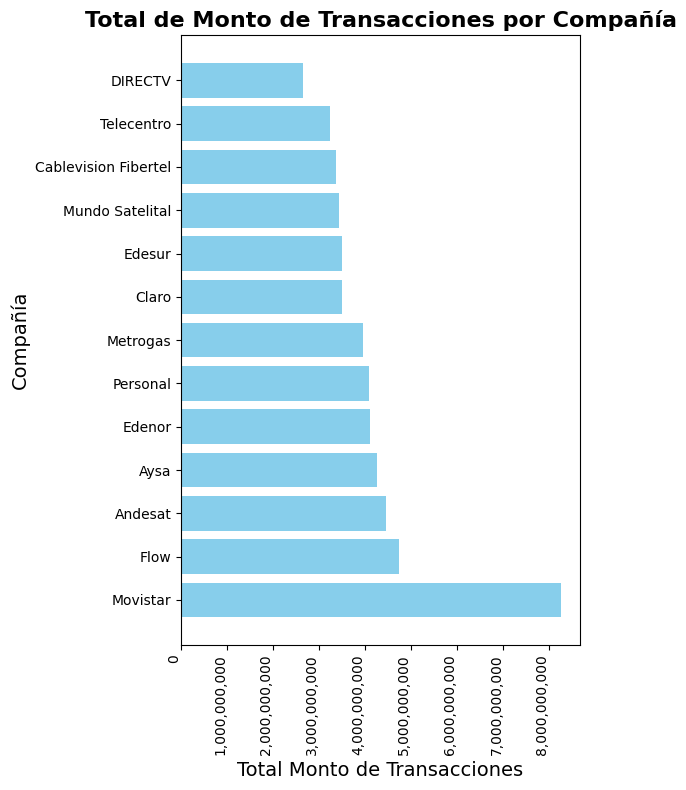

In [129]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Crear el gráfico de barras horizontales
plt.figure(figsize=(6, 8))
plt.barh(total_transactions_per_company_sorted['Company Name'], total_transactions_per_company_sorted['Total Transaction Amount'], color='skyblue')

# Añadir título y etiquetas
plt.title('Total de Monto de Transacciones por Compañía', fontsize=16, fontweight='bold')
plt.xlabel('Total Monto de Transacciones', fontsize=14)
plt.ylabel('Compañía', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotar las etiquetas en el eje x para mayor legibilidad

# Formatear el eje X para mostrar los números completos
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Mostrar el gráfico
plt.tight_layout()
plt.show()


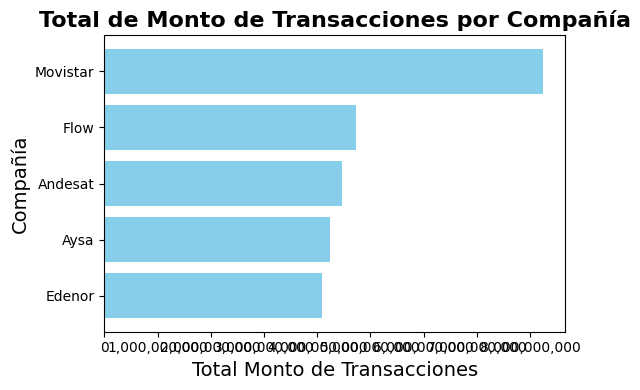

In [140]:
# Invertir el orden del DataFrame
total_transactions_per_company_sorted = total_transactions_per_company_sorted[::-1].head(5)


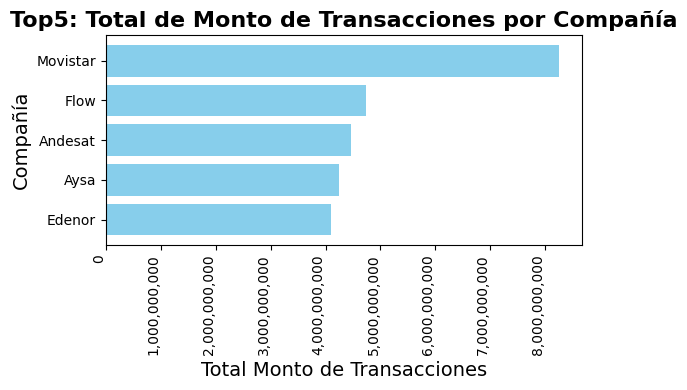

In [150]:

# Crear el gráfico de barras horizontales
plt.figure(figsize=(6, 4))
plt.barh(total_transactions_per_company_sorted['Company Name'], total_transactions_per_company_sorted['Total Transaction Amount'], color='skyblue')

# Añadir título y etiquetas
plt.title('Top5: Total de Monto de Transacciones por Compañía', fontsize=16, fontweight='bold')
plt.xlabel('Total Monto de Transacciones', fontsize=14)
plt.ylabel('Compañía', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotar las etiquetas en el eje x para mayor legibilidad

# Formatear el eje X para mostrar los números completos
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Mostrar el gráfico
plt.tight_layout()
plt.show()
